# <div class="alert alert-info" style="text-align: center;" markdown="1">Regression and Prediction</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## `Simple Regression Equation`

$y = b_0 + b_1x$

- where:
    - $y$ is the dependent variable
    - $b_0$ is the intercept
    - $b_1$ is the coefficients
    - $x$ is the independent variables

In [3]:
df_lung = pd.read_csv("data/LungDisease.csv")
df_lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [4]:
predictors = df_lung["Exposure"]
target = df_lung["PEFR"]

In [12]:
model = LinearRegression()
model.fit(predictors.values.reshape(-1,1), target)

print(model.coef_, model.intercept_)

[-4.18457649] 424.582806573957


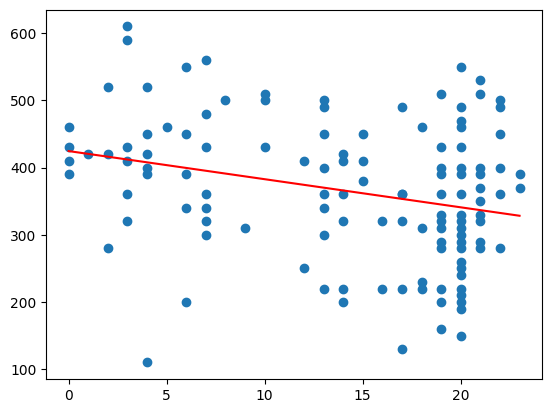

In [15]:
# Regression line

plt.scatter(predictors, target)
plt.plot(predictors, model.predict(predictors.values.reshape(-1,1)), color="red")
plt.show()

In [17]:
fitted = model.predict(predictors.values.reshape(-1,1))
residuals = target - fitted
residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

### Least Squares

- Sum of squared residuals.

$SSR = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

- where:
    - $y_i$ is the actual value
    - $\hat{y_i}$ is the predicted value

## `Multiple Regression Equation`

$y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$

- where:
    - $y$ is the dependent variable
    - $b_0$ is the intercept
    - $b_1, b_2, ..., b_n$ are the coefficients
    - $x_1, x_2, ..., x_n$ are the independent variables

In [19]:
df_house = pd.read_csv("data/house_sales.csv", sep="\t")
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [20]:
predictors = ["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]
target = df_house["AdjSalePrice"]

In [21]:
model = LinearRegression()
model.fit(df_house[predictors], target)

LinearRegression()

In [22]:

print(model.coef_, model.intercept_)

[ 2.28830604e+02 -6.04668207e-02 -1.94428404e+04 -4.77699552e+04
  1.06106963e+05] -521871.36818828376


### Assesing the Model

- RMSE (Root Mean Squared Error)

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$

- where:
    - $y_i$ is the actual value
    - $\hat{y_i}$ is the predicted value

In [23]:
fitted = model.predict(df_house[predictors])
residuals = target - fitted

RMSE = np.sqrt(np.mean(residuals**2))
print(RMSE)

261220.19743696266


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

print(np.sqrt(mean_squared_error(target, fitted)))
print(r2_score(target, fitted))

261220.19743696266
0.5405875253381902


### Cross Validation

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

- #### K-Fold Cross Validation

    - The data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set.


### Weighted Regression



In [36]:
df_house["weights"] = df_house["DocumentDate"].str[:4].astype(int) - 2005

In [37]:
model = LinearRegression()
model.fit(df_house[predictors], target, sample_weight=df_house["weights"])

LinearRegression()

In [38]:
fitted = model.predict(df_house[predictors])
residuals = target - fitted

print(np.sqrt(mean_squared_error(target, fitted)))
print(r2_score(target, fitted))

261908.05510888086
0.5381648454281938


## `Categorical Variables in Regression`

### Dummy Variables (One-Hot Encoding)

- Dummy variables are used to include categorical data in a regression model.

In [39]:
df_house.PropertyType.head()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

- To use this variable in a regression model, we need to convert it into a set of binary variables.

In [41]:
pd.get_dummies(df_house.PropertyType).head()

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [43]:
# To avoid multicollinearity, we drop the first column
pd.get_dummies(df_house.PropertyType, drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [45]:
predictors = ["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade", "PropertyType"]
target = df_house["AdjSalePrice"]
X = pd.get_dummies(df_house[predictors], drop_first=True)
X.head()

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,PropertyType_Single Family,PropertyType_Townhouse
1,2400,9373,3.00,6,7,0,0
2,3764,20156,3.75,4,10,1,0
3,2060,26036,1.75,4,8,1,0
4,3200,8618,3.75,5,7,1,0
5,1720,8620,1.75,4,7,1,0


In [46]:
model = LinearRegression()
model.fit(X, target)

LinearRegression()

In [47]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -446841.366311674
Coefficients: [ 2.23373629e+02 -7.03679814e-02 -1.59790135e+04 -5.08897322e+04
  1.09416305e+05 -8.46782163e+04 -1.15121979e+05]


In [49]:
fitted = model.predict(X)
residuals = target - fitted

print(np.sqrt(mean_squared_error(target, fitted)))
print(r2_score(target, fitted))

260971.6799933774
0.5414612533643957


### Categorical Variables with Many Levels

In [52]:
pd.DataFrame(df_house.ZipCode.value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [63]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        "ZipCode": df_house.ZipCode,
        'residuals': residuals
    })
    .groupby(["ZipCode"])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residuals.median()
    })
]).sort_values("median_residual")

In [64]:
zip_groups.head()

,ZipCode,count,median_residual
36,98057,4,-538938.746571
27,98043,1,-304848.132844
46,98092,289,-195063.801799
23,98038,788,-148401.858065
31,98051,32,-142571.462708


In [65]:
zip_groups["cumulative_count"] = zip_groups["count"].cumsum()
zip_groups["ZipGroup"] = pd.cut(zip_groups["cumulative_count"], bins=5, labels=range(5))
zip_groups.head()

,ZipCode,count,median_residual,cumulative_count,ZipGroup
36,98057,4,-538938.746571,4,0
27,98043,1,-304848.132844,5,0
46,98092,289,-195063.801799,294,0
23,98038,788,-148401.858065,1082,0
31,98051,32,-142571.462708,1114,0


In [67]:
to_join = zip_groups[["ZipCode", "ZipGroup"]].set_index("ZipCode")
df_house = df_house.join(to_join, on="ZipCode")
df_house["ZipGroup"] = df_house["ZipGroup"].astype("category")
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,weights,ZipGroup
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,7,1991,0,0,70000,229000,98002,False,9,1
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,10,2005,0,0,203000,590000,98166,True,1,2
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,8,1947,0,0,183000,275000,98166,False,2,2
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,7,1966,0,0,104000,229000,98168,False,3,2
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,7,1948,0,0,104000,205000,98168,False,8,2


### Ordinal Categorical Variables

- Ordinal variables are categorical variables that have a clear ordering.
- We can convert these variables into numerical values.

## `Interpreting the Regression Equation`

### Correlated Predictors

- When predictors are correlated, the estimated coefficients can be unreliable.

In [68]:
print("Intercept:", model.intercept_)
print("Coefficients:")

for name, coef in zip(X.columns, model.coef_):
    print(name, coef)

Intercept: -446841.366311674
Coefficients:
SqFtTotLiving 223.37362892503828
SqFtLot -0.07036798136813083
Bathrooms -15979.013473415205
Bedrooms -50889.73218483025
BldgGrade 109416.30516146179
PropertyType_Single Family -84678.21629549257
PropertyType_Townhouse -115121.97921609184


In [69]:
predictors = ["Bedrooms", "BldgGrade", "PropertyType", "YrBuilt"]
target = df_house["AdjSalePrice"]

In [70]:
X = pd.get_dummies(df_house[predictors], drop_first=True)
X.head()

,Bedrooms,BldgGrade,YrBuilt,PropertyType_Single Family,PropertyType_Townhouse
1,6,7,1991,0,0
2,4,10,2005,1,0
3,4,8,1947,1,0
4,5,7,1966,1,0
5,4,7,1948,1,0


In [71]:
model = LinearRegression()
model.fit(X, target)

LinearRegression()

In [72]:
fitted = model.predict(X)
residuals = target - fitted

print(np.sqrt(mean_squared_error(target, fitted)))
print(r2_score(target, fitted))

268113.92781191465
0.5160193182911705


### Multi-Collinearity

- An extreme case of correlation is multi-collinearity, where two or more predictors are highly correlated.
- Perfect multi-collinearity occurs when one predictor can be expressed as a linear combination of the others.

### Confounding Variables

- With confounding variables, the problem is one of omitted variable: an important variable is left out of the model.

### Interaction an Main Effects

- Main effects are often reffered to as the predictor variables in a regression model.

> Interaction between **SqFtTotLiving:ZipGroup2** and **SqFtToLiving:ZipGroup3**:

In [99]:
import statsmodels.formula.api as smf

model = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving * ZipGroup  + SqFtLot + ' + ' Bathrooms + Bedrooms + BldgGrade + PropertyType', data=df_house)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3298.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:17:51   Log-Likelihood:            -3.1086e+05
No. Observations:               22687   AIC:                         6.218e+05
Df Residuals:                   22671   BIC:                         6.219e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.748e+05   2.05e+04    -23.172      0.000   -5.15e+05   -4.35e+05
ZipGroup[T.1]                  -3.31e+04   1.28e+04     -2.593      0.010   -5.81e+04   -8082.649
ZipGroup[T.2]                  1.243e+04    1.2e+04      1.036      0.300   -1.11e+04     3.6e+04
ZipGroup[T.3]                 -7651.7537   1.24e+04     -0.617      0.537    -3.2e+04    1.67e+04
ZipGroup[T.4]                 -1.759e+05   1.17e+04    -15.045      0.000   -1.99e+05   -1.53e+05
PropertyType[T.Single Family]  1.586e+04   1.38e+04      1.146      0.252   -1.13e+04     4.3e+04
PropertyType[T.Townhouse]     -5.654e+04   1.51e+04     -3.756      0.000   -8.61e+04    -2.7e+04
SqFtTotLiving                   104.1395      5.039     20.667      0.000      94.263     114.016
SqFtTotLiving:ZipGroup[T.1]      46.9400      5.459      8.599      0.000      36.241      57.639
SqFtTotLiving:ZipGroup[T.2]      48.2843      5.405      8.934      0.000      37.691      58.878
SqFtTotLiving:ZipGroup[T.3]      95.3545      5.727     16.649      0.000      84.128     106.581
SqFtTotLiving:ZipGroup[T.4]     244.3591      5.051     48.383      0.000     234.460     254.258
SqFtLot                           0.6730      0.051     13.110      0.000       0.572       0.774
Bathrooms                     -5005.0008   3182.321     -1.573      0.116   -1.12e+04    1232.566
Bedrooms                      -4.033e+04   2108.863    -19.124      0.000   -4.45e+04   -3.62e+04
BldgGrade                      1.051e+05   2052.634     51.214      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30682.932   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33564128.499
Skew:                           7.166   Prob(JB):                         0.00
Kurtosis:                     190.886   Cond. No.                     5.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## `Reggression Diagnostic`

### Outliers

- In regression outliers is a record whose actual value is far from the predicted value.

In [78]:
house_98105 = df_house[df_house.ZipCode == 98105]
predictors = ["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]
target = house_98105["AdjSalePrice"]

In [81]:
import statsmodels.api as sm
model_outliers = sm.OLS(target, house_98105[predictors].assign(const=1))
result_outliers = model_outliers.fit()
result_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          1.69e-103
Time:                        20:00:16   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587      0.000     161.574     257.631
SqFtLot          38.9333      5.330      7.305      0.000      28.445      49.421
Bathrooms      2282.2641      2e+04      0.114      0.909    -3.7e+04    4.16e+04
Bedrooms      -2.632e+04   1.29e+04     -2.043      0.042   -5.17e+04    -973.867
BldgGrade        1.3e+05   1.52e+04      8.533      0.000       1e+05     1.6e+05
const         -7.725e+05   9.83e+04     -7.861      0.000   -9.66e+05   -5.79e+05
==============================================================================
Omnibus:                       82.127   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.561
Skew:                           0.859   Prob(JB):                    4.26e-128
Kurtosis:                       9.483   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(result_outliers)
influence.summary_frame()

,dfb_SqFtTotLiving,dfb_SqFtLot,dfb_Bathrooms,dfb_Bedrooms,dfb_BldgGrade,dfb_const,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1036,-0.125290,-0.000515,-0.333379,-0.079473,0.355775,-0.193888,0.061440,-2.622626,0.050869,-0.607155,-2.648185,-0.613072
1769,0.055249,-0.055857,0.033285,-0.060896,-0.047651,0.049793,0.001938,-0.892439,0.014388,-0.107828,-0.892142,-0.107792
1770,-0.001648,-0.022508,0.001138,0.007058,0.015993,-0.018091,0.000211,-0.354599,0.009945,-0.035540,-0.354093,-0.035490
1771,-0.061826,-0.054655,0.027716,0.049985,0.074387,-0.082970,0.002906,-1.054669,0.015435,-0.132053,-1.054863,-0.132078
1783,-0.028669,-0.011060,-0.007731,-0.000894,0.011657,0.004167,0.001010,-0.563783,0.018706,-0.077839,-0.563156,-0.077752
...,...,...,...,...,...,...,...,...,...,...,...,...
26628,0.002754,-0.004252,-0.006529,0.003311,0.003276,-0.002359,0.000014,0.085499,0.011676,0.009293,0.085361,0.009278
26629,-0.009418,0.005211,0.004278,0.006629,0.015610,-0.022984,0.000244,-0.544324,0.004909,-0.038233,-0.543699,-0.038189
26630,0.004713,0.021502,0.004005,-0.033168,-0.008856,0.013503,0.000355,-0.355351,0.016586,-0.046149,-0.354844,-0.046083
26631,-0.001692,0.000563,0.001825,0.005071,-0.000341,-0.002197,0.000008,-0.049035,0.020766,-0.007141,-0.048956,-0.007129


In [87]:
sresisiduals = influence.resid_studentized_internal
sresisiduals.idxmin(), sresisiduals.idxmax()

(24333, 14392)

In [89]:
outlier = house_98105.loc[sresisiduals.idxmin(), :]
print('AdjSalePrice:', outlier.AdjSalePrice)
print(outlier[predictors])

AdjSalePrice: 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


### Influential Values

- Influential values are records that have a large effect on the regression model.
- High influence values are those whose **Cook's distance is greater than > 0.08.**

#### Cook's Distance

- Cook's distance is a measure of the influence of each individual observation on the regression coefficients.

$D_i = \frac{\sum_{j=1}^{n} (\hat{y_j} - \hat{y_{j(i)}})^2}{p \times MSE}$

- where:
    - $D_i$ is the Cook's distance
    - $\hat{y_j}$ is the predicted value
    - $\hat{y_{j(i)}}$ is the predicted value without the ith observation
    - $p$ is the number of predictors
    - $MSE$ is the mean squared error

> #### Influence Plot

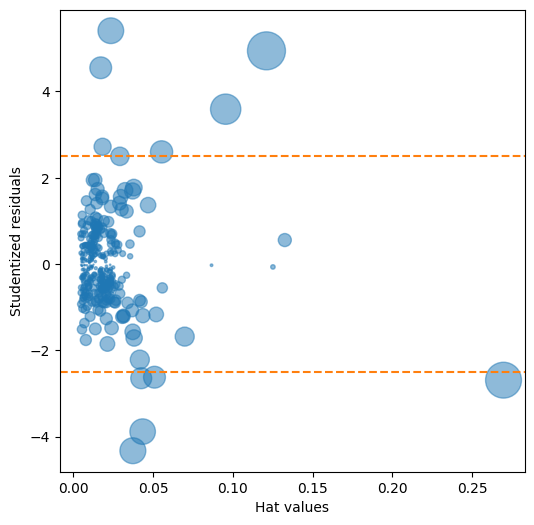

In [90]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, s=1000*np.sqrt(influence.cooks_distance[0]), alpha=0.5)
ax.set_xlabel('Hat values')
ax.set_ylabel('Studentized residuals')
plt.show()

### Heteroscedasticity

- Heteroscedasticity is a problem in regression analysis where the variance of the residuals is not constant. Errors are greater for some portion of the range than for others.

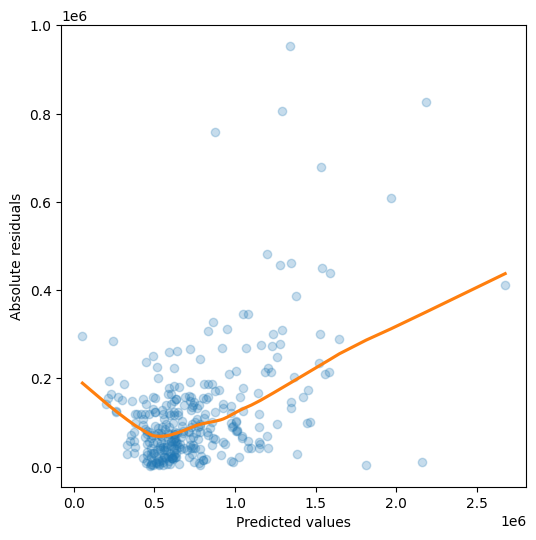

In [92]:
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(x=result_outliers.fittedvalues, y=np.abs(result_outliers.resid), scatter_kws={'alpha':0.25}, line_kws={'color':'C1'}, lowess=True, ax=ax)
ax.set_xlabel('Predicted values')
ax.set_ylabel('Absolute residuals')
plt.show()

### Normality of Residuals

- The residuals should be normally distributed.

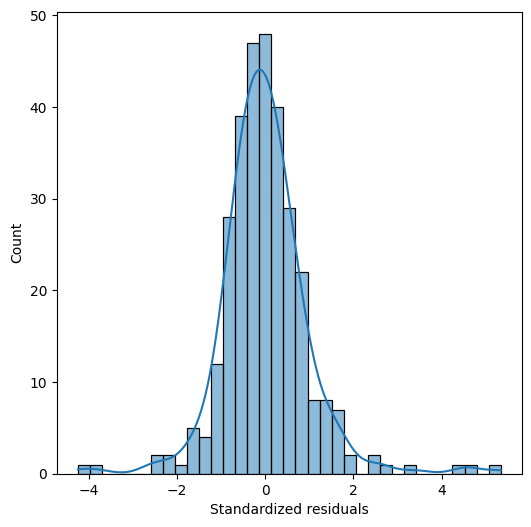

In [93]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(result_outliers.resid_pearson, kde=True, ax=ax)
ax.set_xlabel('Standardized residuals')
plt.show()

- We can see the plot exibits mild skewness towards the larger residuals.

### Correlation of Residuals

- The residuals should not be correlated.

### Partial Residual Plots and Nonlinearity

- Partial residual plots are a way to visualize how well the estimated fit explains the relationship between the target and the predictor.

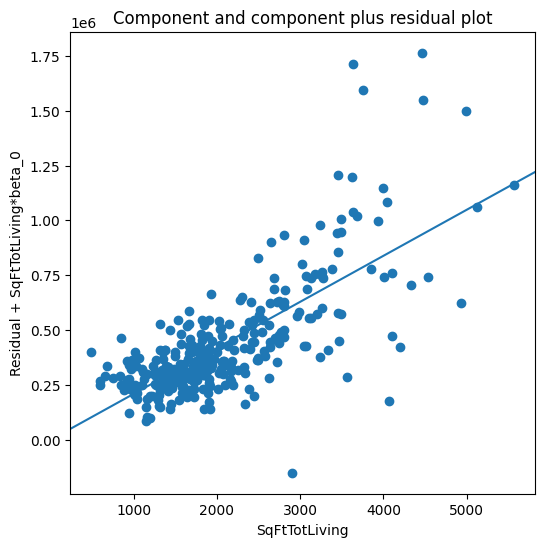

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
sm.graphics.regressionplots.plot_ccpr(result_outliers, 'SqFtTotLiving', ax=ax)
plt.show()

## `Polynomial and Spline Regression`

### Polynomial Regression

- Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial.


$y = b_0 + b_1x + b_2x^2 + ... + b_nx^n$


In [100]:
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + I(SqFtTotLiving**2) + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          9.95e-106
Time:                        21:19:46   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving             7.4521     55.418      0.134      0.893    -101.597     116.501
I(SqFtTotLiving ** 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                  32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms             -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms              -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade              1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

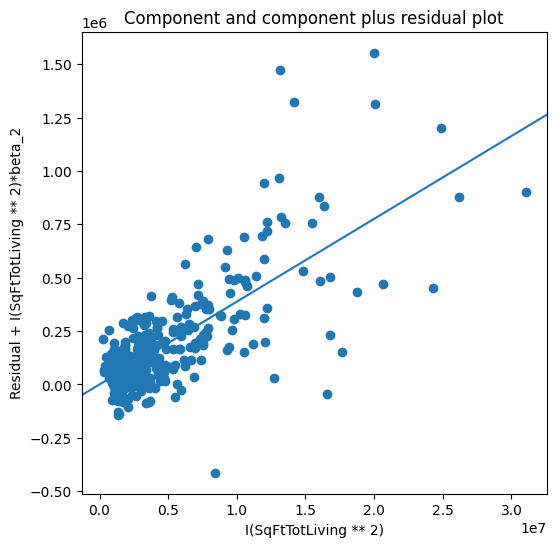

In [147]:
fig, ax = plt.subplots(figsize=(6,6))
sm.graphics.regressionplots.plot_ccpr(result_poly, 'I(SqFtTotLiving ** 2)', ax=ax)
plt.show()

### Spline Regression

- Spline regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as a piecewise polynomial.



In [115]:
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade'
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          7.10e-104
Time:                        18:35:50   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -4.142e+05   1.43e+05     -2.899      0.004   -6.95e+05   -1.33e+05
bs(SqFtTotLiving, df=6, degree=3)[0] -1.995e+05   1.86e+05     -1.076      0.283   -5.65e+05    1.66e+05
bs(SqFtTotLiving, df=6, degree=3)[1] -1.206e+05   1.23e+05     -0.983      0.326   -3.62e+05    1.21e+05
bs(SqFtTotLiving, df=6, degree=3)[2] -7.164e+04   1.36e+05     -0.525      0.600    -3.4e+05    1.97e+05
bs(SqFtTotLiving, df=6, degree=3)[3]  1.957e+05   1.62e+05      1.212      0.227   -1.22e+05    5.14e+05
bs(SqFtTotLiving, df=6, degree=3)[4]  8.452e+05   2.18e+05      3.878      0.000    4.16e+05    1.27e+06
bs(SqFtTotLiving, df=6, degree=3)[5]  6.955e+05   2.14e+05      3.255      0.001    2.75e+05    1.12e+06
SqFtLot                                 33.3258      5.454      6.110      0.000      22.592      44.059
Bathrooms                            -4778.2080   1.94e+04     -0.246      0.806    -4.3e+04    3.34e+04
Bedrooms                             -5778.7045   1.32e+04     -0.437      0.663   -3.18e+04    2.03e+04
BldgGrade                             1.345e+05   1.52e+04      8.842      0.000    1.05e+05    1.64e+05
==============================================================================
Omnibus:                       58.816   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.021
Skew:                           0.330   Prob(JB):                    8.51e-136
Kurtosis:                       9.874   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Generalized Additive Models (GAM)

- Generalized additive models can be used to automatically fit spline regression models.

In [152]:
from pygam import LinearGAM, s, l

In [153]:
predictors = ["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]
target = house_98105["AdjSalePrice"]

In [156]:
model_gam = LinearGAM(s(0, n_splines=12) + l(1) + l(2) + l(3) + l(4))
model_gam.gridsearch(house_98105[predictors].values, target)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + l(1) + l(2) + l(3) + l(4) + intercept, tol=0.0001, 
   verbose=False)